In [2]:
import gc
import pickle
import sys
import time

import numpy as np
import pandas as pd
from xgboost import XGBRegressor

sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)

In [3]:
data = pd.read_csv("new_data_for_model.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.query('DEPARTMENT_ID == 40').groupby('Week_num')['ACTUAL_SALES'].sum()

Week_num
52     4627323.03
53     4819534.51
54     4834222.67
55     4924103.71
56     4779930.97
          ...    
211          0.00
212          0.00
213          0.00
214          0.00
215          0.00
Name: ACTUAL_SALES, Length: 164, dtype: float64

In [41]:
data = pd.read_csv("new_data_for_model.csv")
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["DISTRICT_CODE"] = le.fit.transform(data["DISTRICT"])
data = data[
    [
        "Week_num",
        "DEPARTMENT_ID",
        "ACTUAL_SALES",
        # 'PROMO_DISCOUNT',
        # 'CLEARANCE_DISCOUNT',
        # 'COUPON_DISCOUNT',
        # 'MISCELLANOUS_DISCOUNT',
        "UNITS_SOLD",
        "UNIT_PRICE",
        "ACTUAL_SALES_lag_4",
        "ACTUAL_SALES_lag_8",
        "ACTUAL_SALES_lag_12",
        "ACTUAL_SALES_lag_26",
        "ACTUAL_SALES_lag_52",
        "department_avg_sale_last_26",
        "department_std_sale_last_26",
        "department_avg_sale_last_52",
        "department_std_sale_last_52",
        "district_avg_sale_last_26",
        "district_std_sale_last_26",
        "district_avg_sale_last_52",
        "district_std_sale_last_52",
        "market_avg_sale_last_52",
        "market_std_sale_last_52",
        "dep_avg_sale_last_52",
        "dep_std_sale_last_52",
        "shop_avg_sale_last_52",
        "shop_std_sale_last_52",
        "week_avg_actual_sales_lag_4",
        "week_dept_avg_actual_sales_lag_4",
        "week_dept_avg_actual_sales_lag_8",
        "week_dept_avg_actual_sales_lag_12",
        "week_dept_avg_actual_sales_lag_26",
        "week_dept_avg_actual_sales_lag_52",
        "week_district_avg_actual_sales_lag_4",
        "week_district_avg_actual_sales_lag_8",
        "week_district_avg_actual_sales_lag_12",
        "week_district_avg_actual_sales_lag_26",
        "week_district_avg_actual_sales_lag_52",
        "week_market_avg_actual_sales_lag_4",
        "week_department_market_avg_actual_sales_lag_4",
        "delta_price_lag",
        "delta_actual_sales_lag_4",
        "Month_num",
        "year",
        "department_district_last_sale",
        "department_last_sale",
        "department_district_first_sale",
        "department_first_sale",
        "DISTRICT_CODE",
    ]
]

AttributeError: 'function' object has no attribute 'transform'

In [42]:
le.fit(data["DISTRICT"])

LabelEncoder()

In [45]:
data["DISTRICT_CODE"] = le.transform(data["DISTRICT"])

In [3]:
data.head().T

,0,1,2,3,4
Week_num,52.000000,52.000000,52.000000,52.000000,52.000000
DEPARTMENT_ID,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES,0.000000,0.000000,0.000000,0.000000,0.000000
UNITS_SOLD,97.000000,124.000000,107.000000,186.000000,110.000000
UNIT_PRICE,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES_lag_4,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES_lag_8,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES_lag_12,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES_lag_26,0.000000,0.000000,0.000000,0.000000,0.000000
ACTUAL_SALES_lag_52,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
data.isna().sum()
data.fillna(0, inplace=True)

In [5]:
data.replace([np.inf, -np.inf], -1, inplace=True)

In [27]:
X_train = data[data.Week_num < 142].drop(["ACTUAL_SALES"], axis=1)
Y_train = data[data.Week_num < 142]["ACTUAL_SALES"]
X_valid = data[(data.Week_num >= 142) & (data.Week_num < 164)].drop(
    ["ACTUAL_SALES"], axis=1
)
Y_valid = data[(data.Week_num >= 142) & (data.Week_num < 164)]["ACTUAL_SALES"]
X_test = data[data.Week_num >= 164].drop(["ACTUAL_SALES"], axis=1)

In [7]:
ts = time.time()

model = XGBRegressor()

model.fit(
    X_train,
    Y_train,
    eval_metric="rmse",
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
    verbose=10,
    early_stopping_rounds=40,
)

time.time() - ts

[0]	validation_0-rmse:133751.64062	validation_1-rmse:153064.26562
[10]	validation_0-rmse:9772.84375	validation_1-rmse:41835.45312
[20]	validation_0-rmse:6038.88721	validation_1-rmse:37024.79297
[30]	validation_0-rmse:5018.84961	validation_1-rmse:36549.89062
[40]	validation_0-rmse:4405.81397	validation_1-rmse:36712.09766
[50]	validation_0-rmse:3874.64600	validation_1-rmse:36685.53516
[60]	validation_0-rmse:3439.19629	validation_1-rmse:36637.42188
[68]	validation_0-rmse:3204.95142	validation_1-rmse:36669.12891


2273.556362390518

In [53]:
Y_pred = model.predict(X_valid)
Y_test = model.predict(X_test)
Y_train_pre = model.predict(X_train)

X_train_level2 = pd.DataFrame(
    {"ID": np.arange(Y_pred.shape[0]), "Actual sales": Y_pred}
)
X_train_level2.to_csv("xgb_valid.csv", index=False)

submission = pd.DataFrame({"ID": np.arange(Y_test.shape[0]), "Actual sales": Y_test})
submission.to_csv("Xgb_test.csv", index=False)

train_pre_df = pd.DataFrame({"Predicted_sales": Y_train_pre})

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [47]:
data["DISTRICT"] = le.inverse_transform(data["DISTRICT_CODE"])

In [102]:
train_result = pd.concat([data[data.Week_num < 142][['Week_num', 'DEPARTMENT_ID','DISTRICT','ACTUAL_SALES']],
                          train_pre_df], axis = 1)
train_result['Train_mark'] = 'Train'

valid_result = data[(data.Week_num >=142) & (data.Week_num <164)][['Week_num', 'DEPARTMENT_ID','DISTRICT','ACTUAL_SALES']].reset_index(drop = True).merge(
                X_train_level2.rename(columns = {'Actual sales':'Predicted_sales'}).drop(columns = 'ID'), left_index =True, right_index=True)
valid_result['Train_mark'] = 'Valid'

test_result = data[data.Week_num >= 164][['Week_num', 'DEPARTMENT_ID','DISTRICT','ACTUAL_SALES']].reset_index(drop = True).merge(
                submission.drop(columns = 'ID').rename(columns = {'Actual sales':'Predicted_sales'}), left_index = True, right_index = True)
test_result['Train_mark'] = 'Test'

In [106]:
final_result = pd.concat([train_result, valid_result, test_result], axis = 0)

In [115]:
# export csv
final_result.to_csv('final_final_result.csv', index = False)

In [10]:
Y_pred

array([-193.35312, -193.35312, -193.35312, ..., 2970.32   , 6177.5195 ,
        -66.15075], dtype=float32)

In [11]:
Y_valid.values

array([   0.  ,    0.  ,    0.  , ...,  979.23, 4943.43,    0.  ])

In [12]:
vliadation_compar = pd.DataFrame({"valid_real": Y_valid.values, "valid_pred": Y_pred})

<AxesSubplot:>

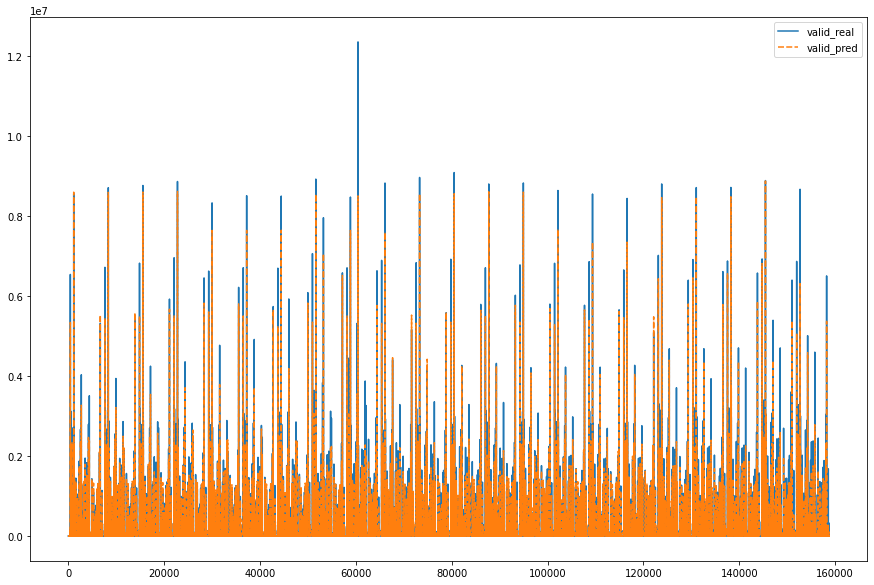

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.lineplot(data=vliadation_compar)